In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "abruzzo"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,13,Abruzzo,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,13,Abruzzo,1,0,1,0,1,1,1,...,0.0,20.0,0.0,0.0,0.00,100.00,5.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,13,Abruzzo,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,13,Abruzzo,2,0,2,0,2,1,1,...,0.0,10.0,0.0,0.0,0.00,100.00,10.00,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-03-21T17:00:00,13,Abruzzo,671,85,756,10426,11182,309,353,...,9.0,7904.0,1927.0,304.0,11.24,6.76,4.47,18.32,2.41,2.84
391,2021-03-22T17:00:00,13,Abruzzo,670,89,759,10309,11068,-114,190,...,7.0,4154.0,864.0,-117.0,11.73,6.86,4.57,21.99,4.71,-1.02
392,2021-03-23T17:00:00,13,Abruzzo,657,87,744,10151,10895,-173,188,...,18.0,5522.0,1523.0,-158.0,11.69,6.83,3.40,12.34,-2.25,-1.56
393,2021-03-24T17:00:00,13,Abruzzo,635,82,717,9934,10651,-244,329,...,11.0,9887.0,2318.0,-217.0,11.44,6.73,3.33,14.19,-5.75,-2.24


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 310
Nuovi tamponi: 9474.0
Percentuale nuovi positivi/nuovi tamponi: 3.0 %
Nuovi guariti: 459.0
Nuovi deceduti: 15.0
Variazione positivi ricoverati con sintomi: -14.0
Variazione positivi in terapia intensiva: -3.0
Variazione positivi in isolamento dimiciliare: -147.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,13,Abruzzo,430,44,474,10180,10654,243,325,...,8.0,13248.0,7981.0,237.0,9.28,4.45,2.45,4.07,7.32,2.33
1,2021-01-25T17:00:00,13,Abruzzo,426,44,470,9726,10196,-458,69,...,25.0,6685.0,4368.0,-454.0,9.36,4.61,1.03,1.58,0.00,-4.30
2,2021-01-26T17:00:00,13,Abruzzo,415,42,457,9590,10047,-149,152,...,17.0,6977.0,3927.0,-136.0,9.19,4.55,2.18,3.87,-4.55,-1.46
3,2021-01-27T17:00:00,13,Abruzzo,402,40,442,9634,10076,29,344,...,6.0,6352.0,2645.0,44.0,9.05,4.39,5.42,13.01,-4.76,0.29
4,2021-01-28T17:00:00,13,Abruzzo,399,40,439,9627,10066,-10,268,...,5.0,6185.0,2745.0,-7.0,9.11,4.36,4.33,9.76,0.00,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-21T17:00:00,13,Abruzzo,671,85,756,10426,11182,309,353,...,9.0,7904.0,1927.0,304.0,11.24,6.76,4.47,18.32,2.41,2.84
57,2021-03-22T17:00:00,13,Abruzzo,670,89,759,10309,11068,-114,190,...,7.0,4154.0,864.0,-117.0,11.73,6.86,4.57,21.99,4.71,-1.02
58,2021-03-23T17:00:00,13,Abruzzo,657,87,744,10151,10895,-173,188,...,18.0,5522.0,1523.0,-158.0,11.69,6.83,3.40,12.34,-2.25,-1.56
59,2021-03-24T17:00:00,13,Abruzzo,635,82,717,9934,10651,-244,329,...,11.0,9887.0,2318.0,-217.0,11.44,6.73,3.33,14.19,-5.75,-2.24


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

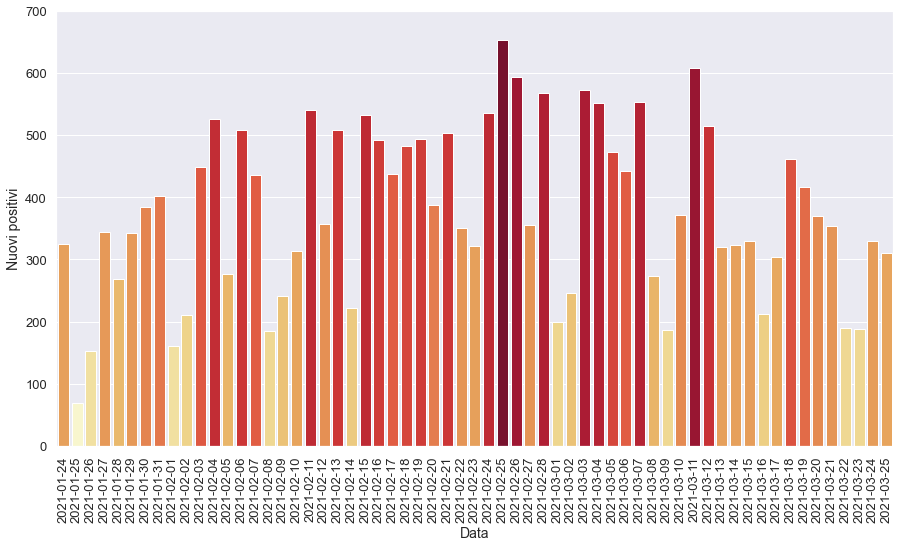

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

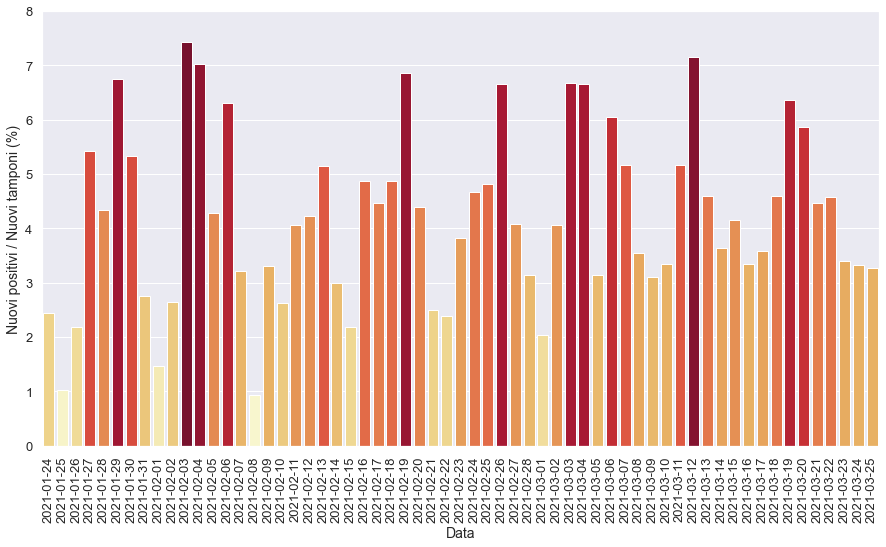

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

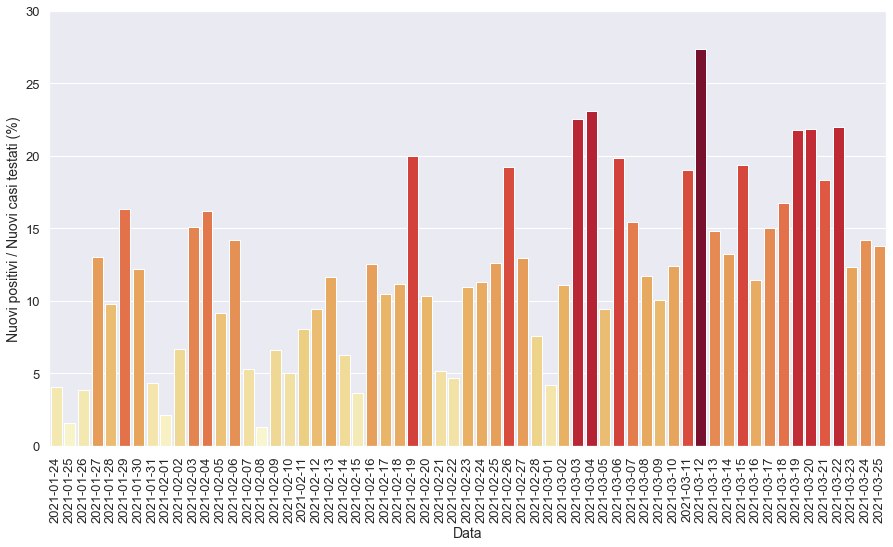

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

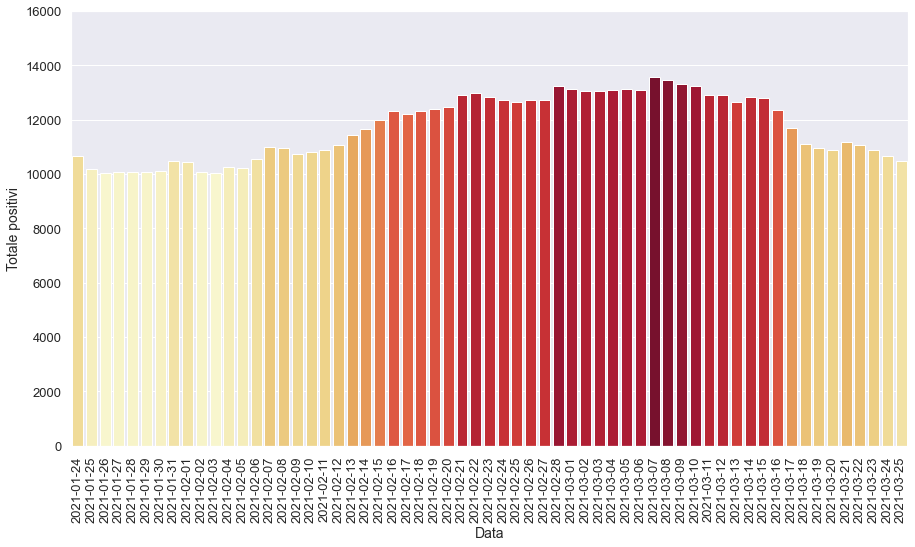

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

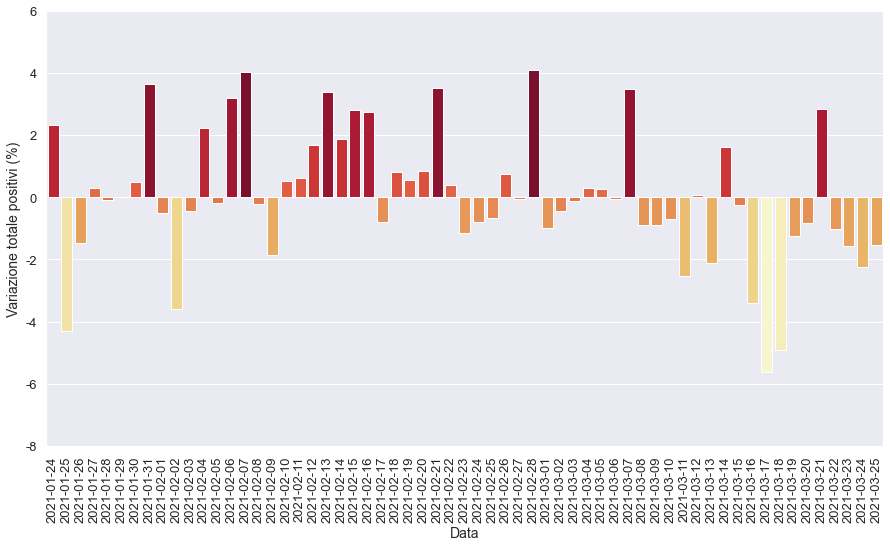

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

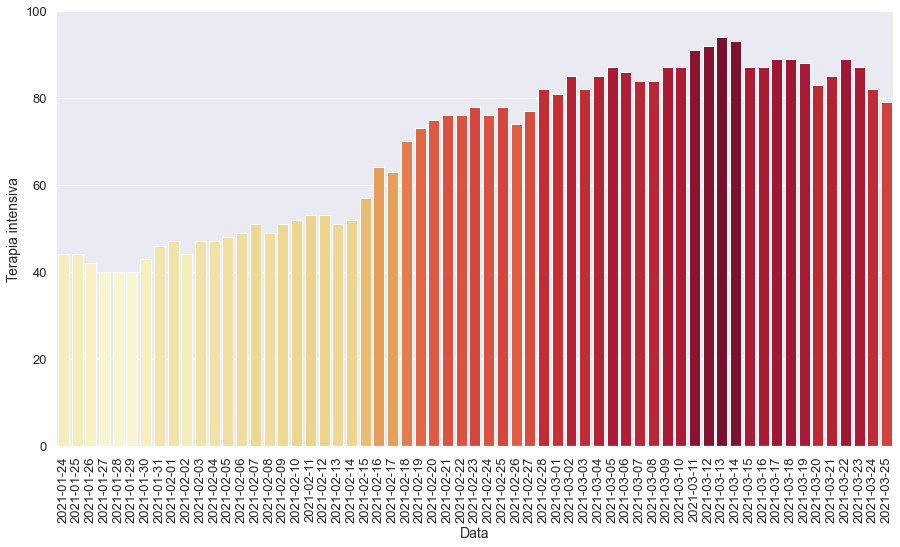

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

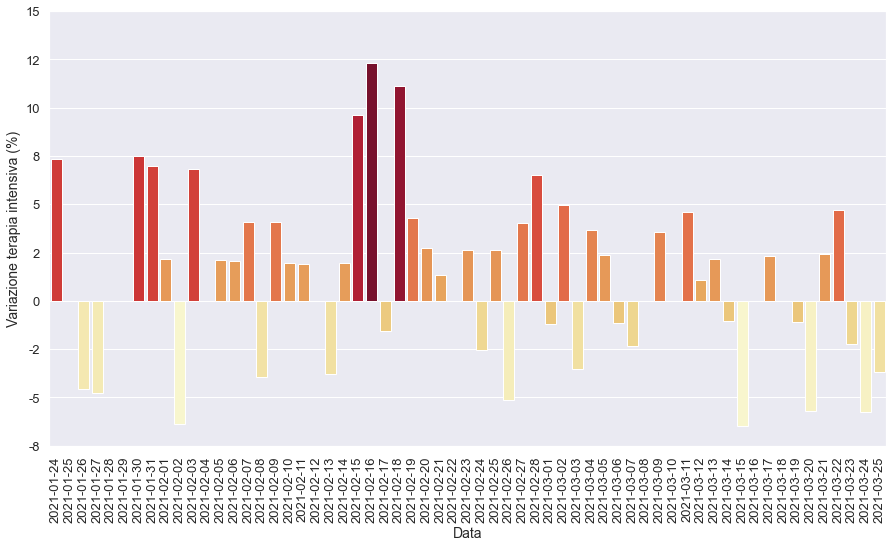

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

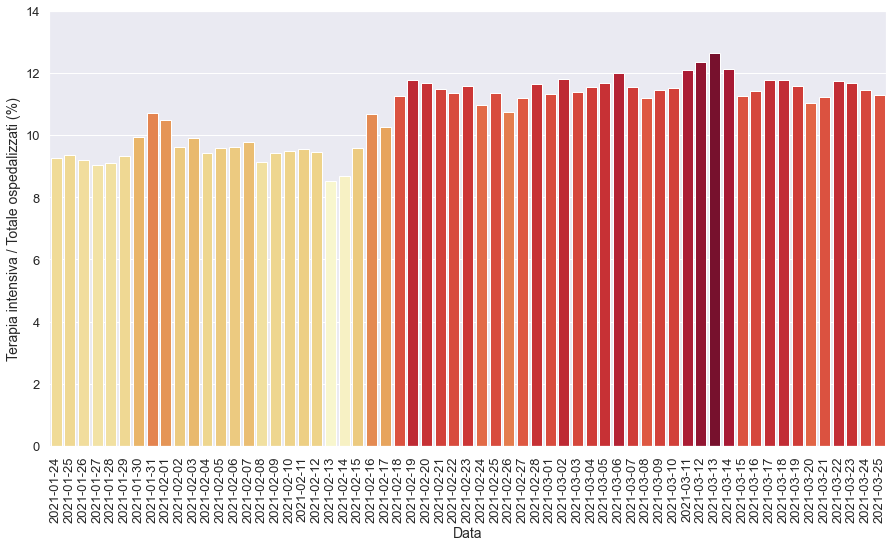

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

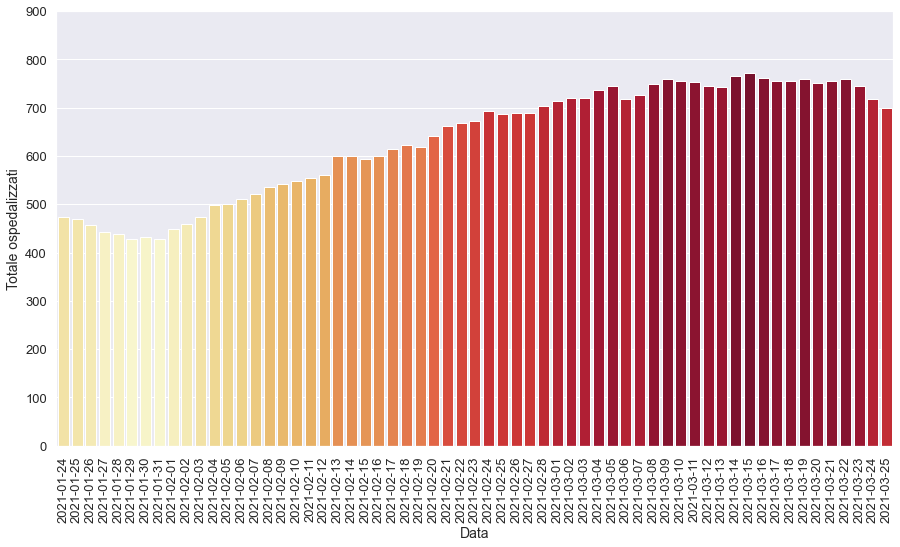

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

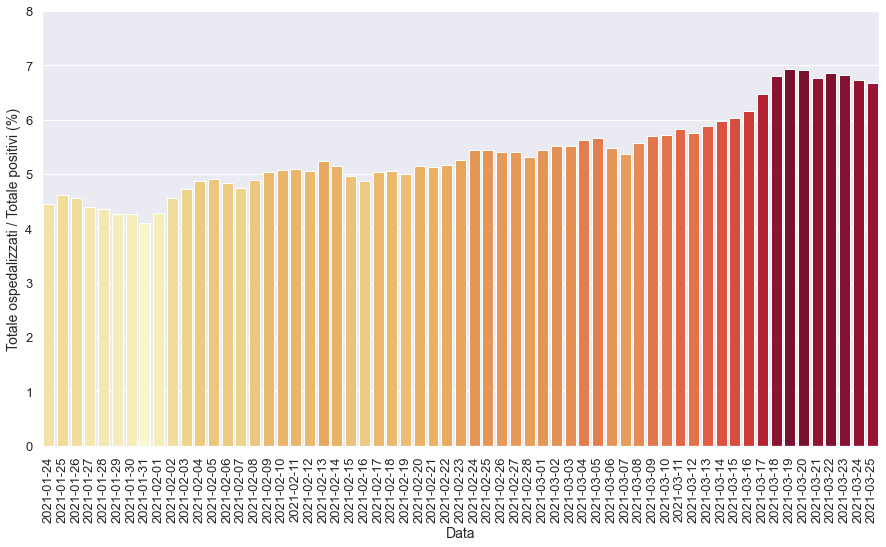

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

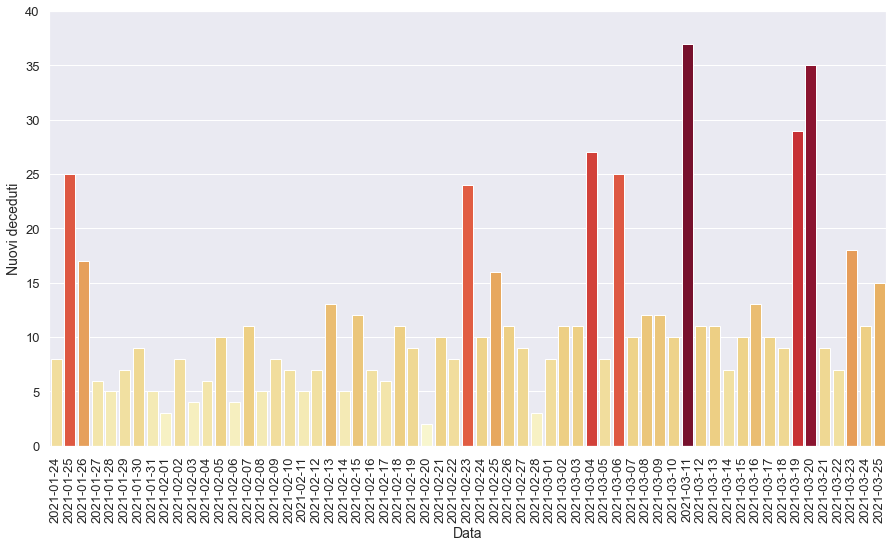

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

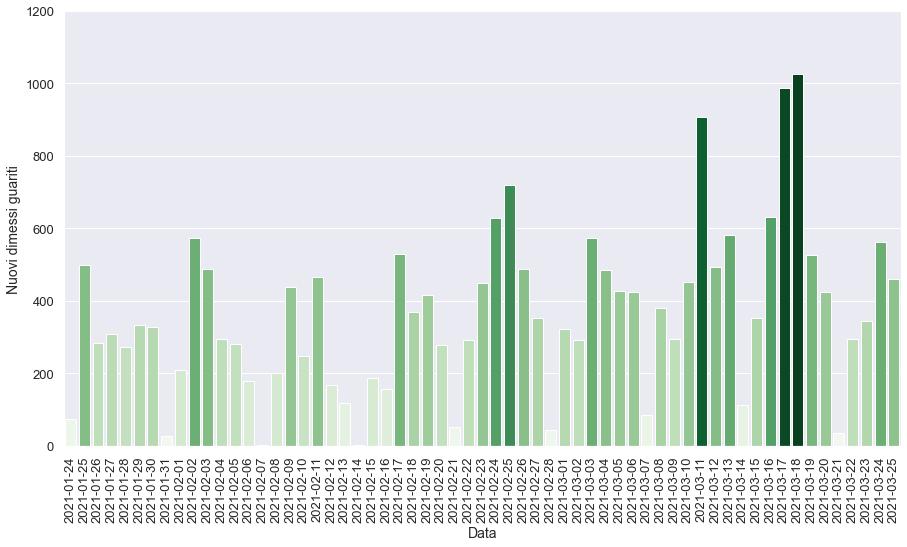

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-23T17:00:00,13,Abruzzo,595,78,673,12150,12823,-150,322,...,24.0,8420.0,2939.0,-154.0,11.59,5.25,3.82,10.96,2.63,-1.16
1,2021-02-24T17:00:00,13,Abruzzo,617,76,693,12027,12720,-103,535,...,10.0,11473.0,4720.0,-123.0,10.97,5.45,4.66,11.33,-2.56,-0.80
2,2021-02-25T17:00:00,13,Abruzzo,609,78,687,11948,12635,-85,653,...,16.0,13566.0,5178.0,-79.0,11.35,5.44,4.81,12.61,2.63,-0.67
3,2021-02-26T17:00:00,13,Abruzzo,614,74,688,12043,12731,96,594,...,11.0,8929.0,3087.0,95.0,10.76,5.40,6.65,19.24,-5.13,0.76
4,2021-02-27T17:00:00,13,Abruzzo,611,77,688,12035,12723,-8,355,...,9.0,8710.0,2738.0,-8.0,11.19,5.41,4.08,12.97,4.05,-0.06
5,2021-02-28T17:00:00,13,Abruzzo,622,82,704,12540,13244,521,568,...,3.0,18108.0,7480.0,505.0,11.65,5.32,3.14,7.59,6.49,4.09
6,2021-03-01T17:00:00,13,Abruzzo,633,81,714,12397,13111,-133,199,...,8.0,9824.0,4734.0,-143.0,11.34,5.45,2.03,4.20,-1.22,-1.00
7,2021-03-02T17:00:00,13,Abruzzo,634,85,719,12336,13055,-56,246,...,11.0,6055.0,2224.0,-61.0,11.82,5.51,4.06,11.06,4.94,-0.43
8,2021-03-03T17:00:00,13,Abruzzo,638,82,720,12320,13040,-15,573,...,11.0,8584.0,2542.0,-16.0,11.39,5.52,6.68,22.54,-3.53,-0.11
9,2021-03-04T17:00:00,13,Abruzzo,651,85,736,12343,13079,39,552,...,27.0,8294.0,2389.0,23.0,11.55,5.63,6.66,23.11,3.66,0.30


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

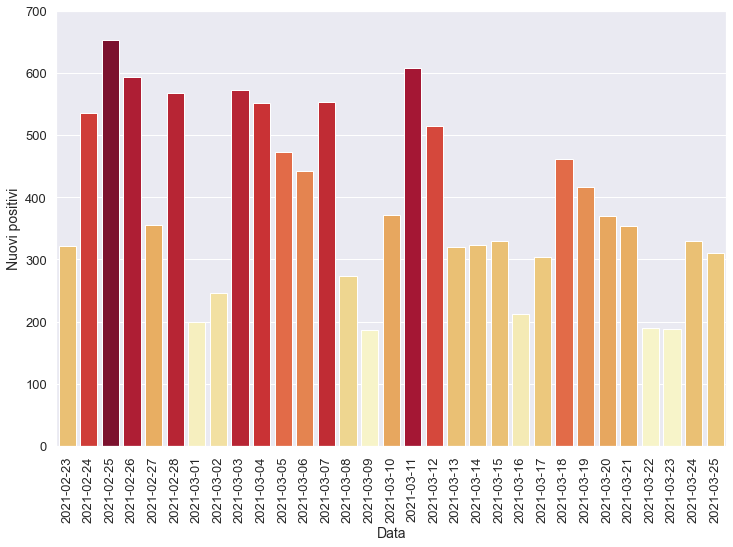

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

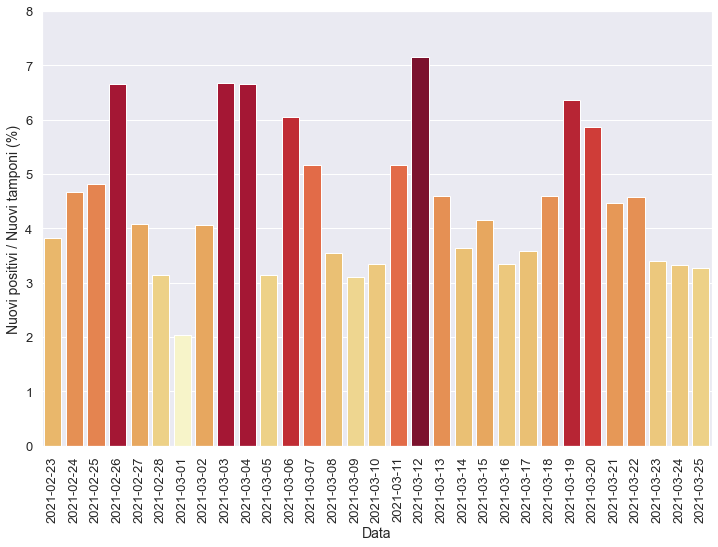

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

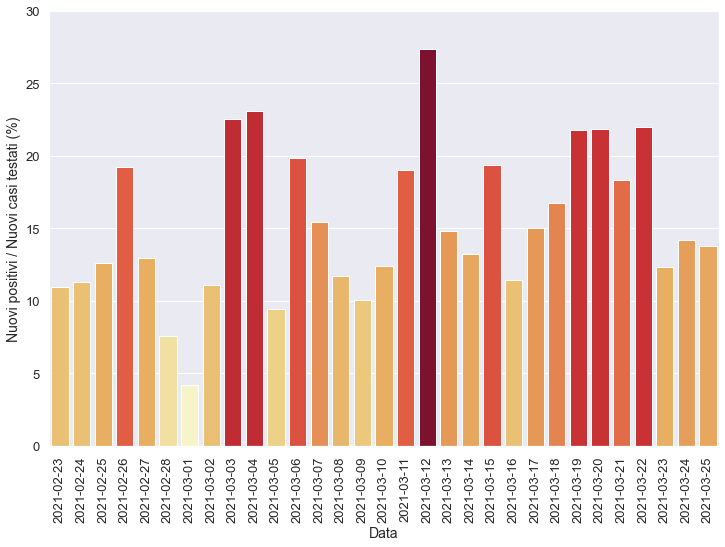

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

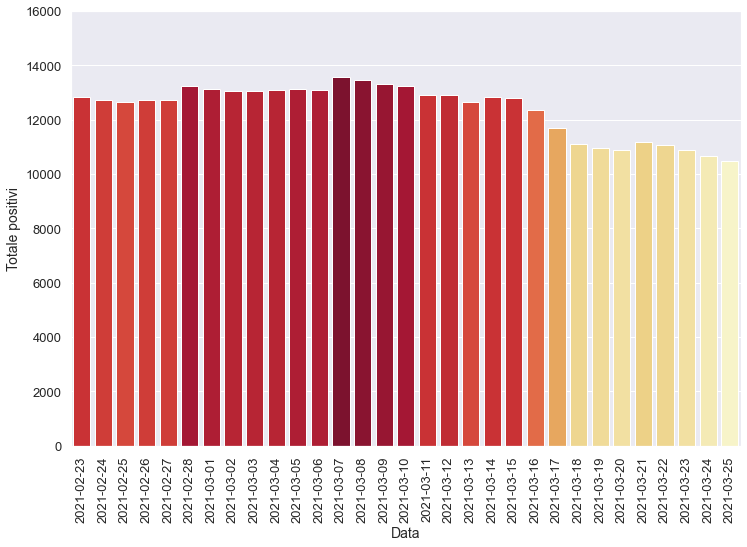

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

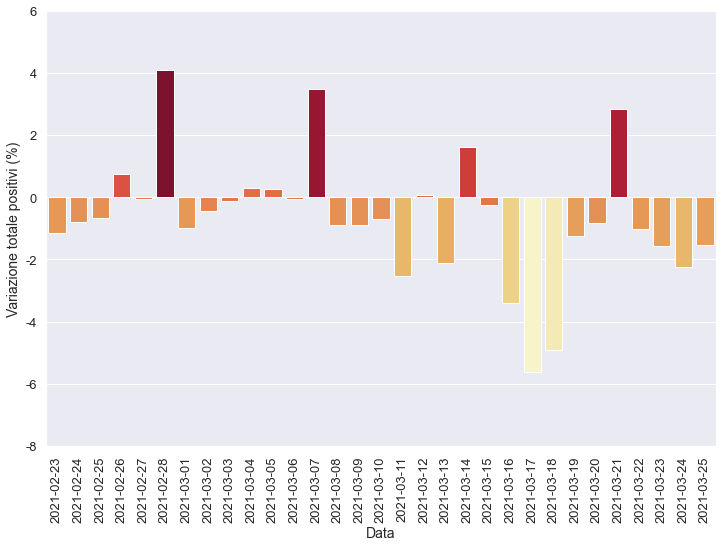

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

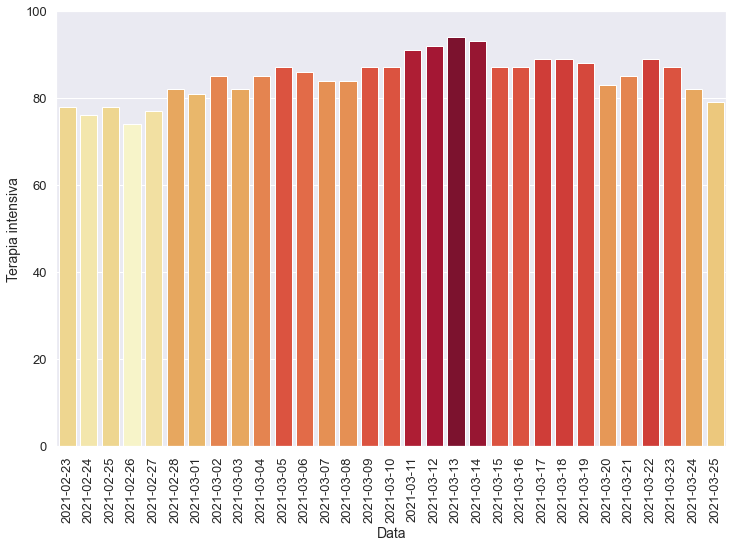

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

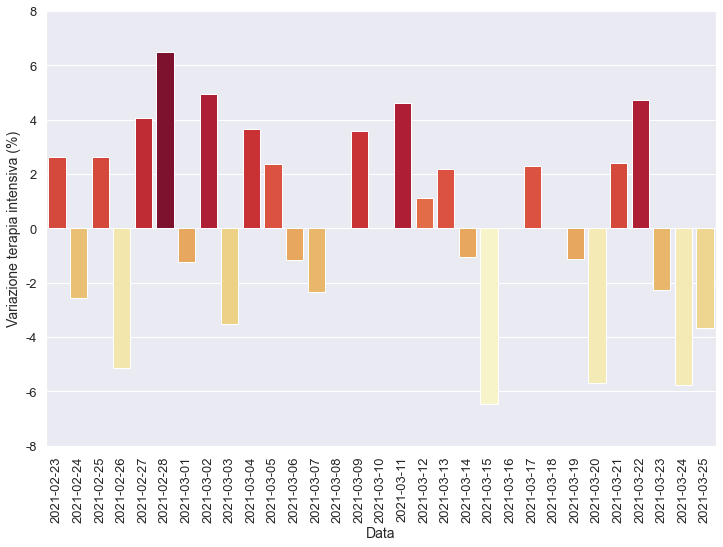

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

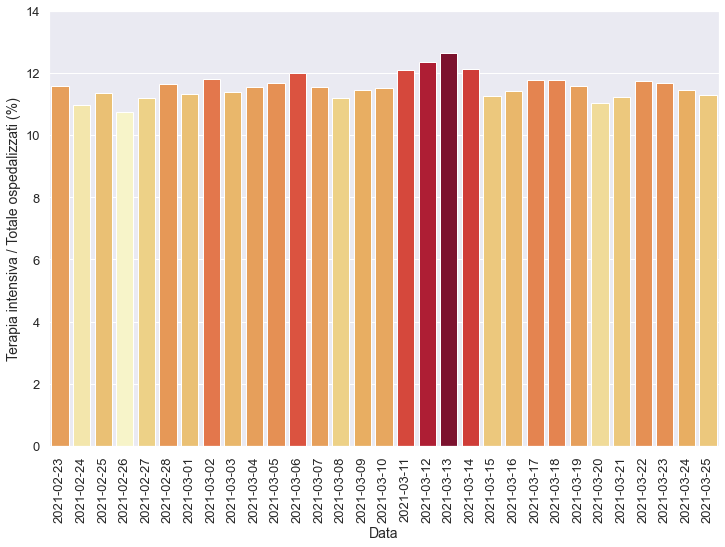

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

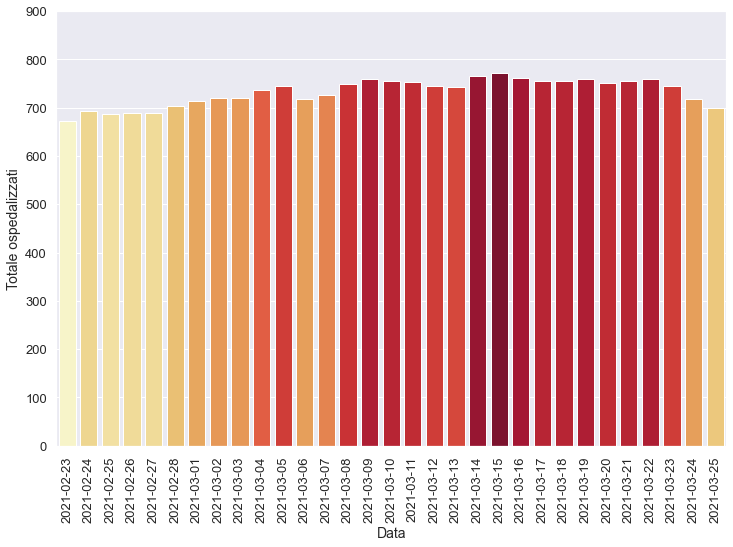

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

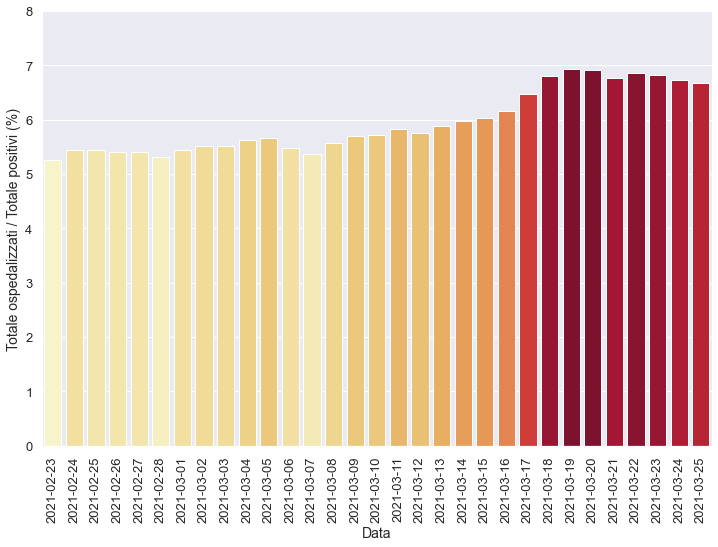

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

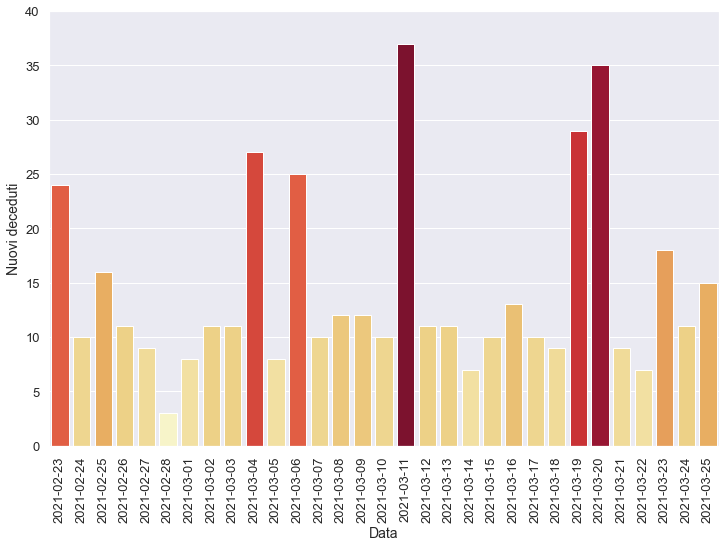

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

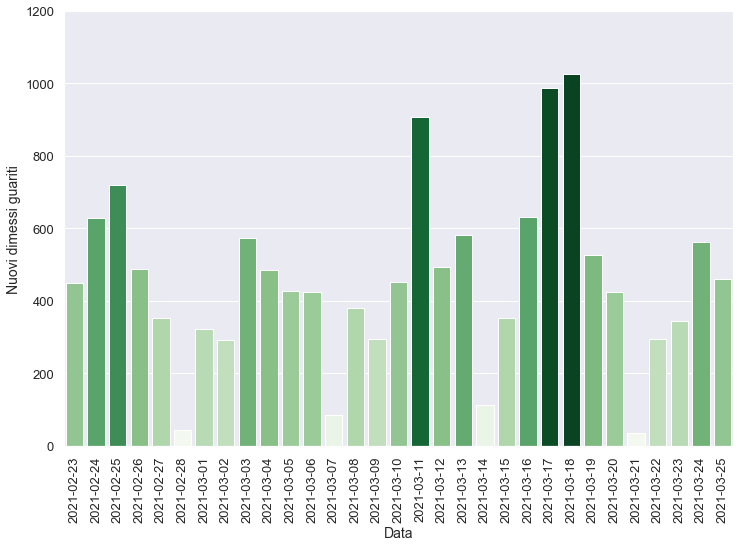

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-18T17:00:00,13,Abruzzo,667,89,756,10346,11102,-576,462,...,9.0,10070.0,2761.0,-576.0,11.77,6.81,4.59,16.73,0.00,-4.93
1,2021-03-19T17:00:00,13,Abruzzo,672,88,760,10203,10963,-139,417,...,29.0,6557.0,1916.0,-143.0,11.58,6.93,6.36,21.76,-1.12,-1.25
2,2021-03-20T17:00:00,13,Abruzzo,668,83,751,10122,10873,-90,370,...,35.0,6318.0,1692.0,-81.0,11.05,6.91,5.86,21.87,-5.68,-0.82
3,2021-03-21T17:00:00,13,Abruzzo,671,85,756,10426,11182,309,353,...,9.0,7904.0,1927.0,304.0,11.24,6.76,4.47,18.32,2.41,2.84
4,2021-03-22T17:00:00,13,Abruzzo,670,89,759,10309,11068,-114,190,...,7.0,4154.0,864.0,-117.0,11.73,6.86,4.57,21.99,4.71,-1.02
5,2021-03-23T17:00:00,13,Abruzzo,657,87,744,10151,10895,-173,188,...,18.0,5522.0,1523.0,-158.0,11.69,6.83,3.40,12.34,-2.25,-1.56
6,2021-03-24T17:00:00,13,Abruzzo,635,82,717,9934,10651,-244,329,...,11.0,9887.0,2318.0,-217.0,11.44,6.73,3.33,14.19,-5.75,-2.24
7,2021-03-25T17:00:00,13,Abruzzo,621,79,700,9787,10487,-164,310,...,15.0,9474.0,2248.0,-147.0,11.29,6.67,3.27,13.79,-3.66,-1.54


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

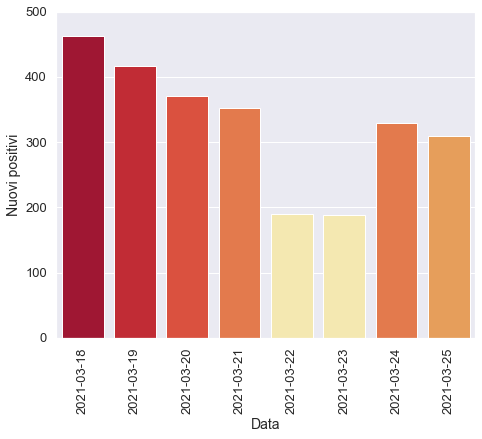

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

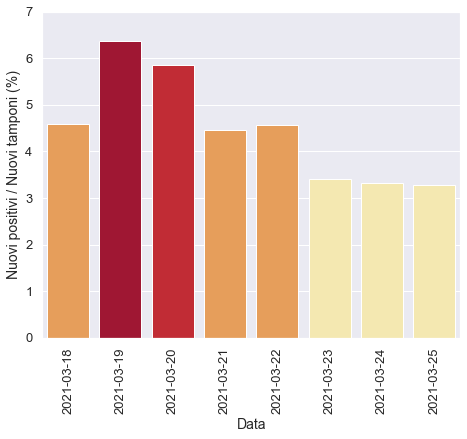

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

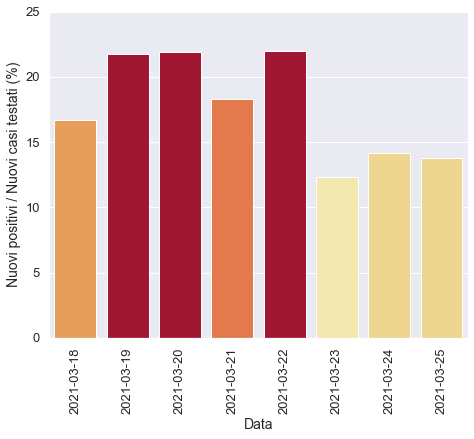

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

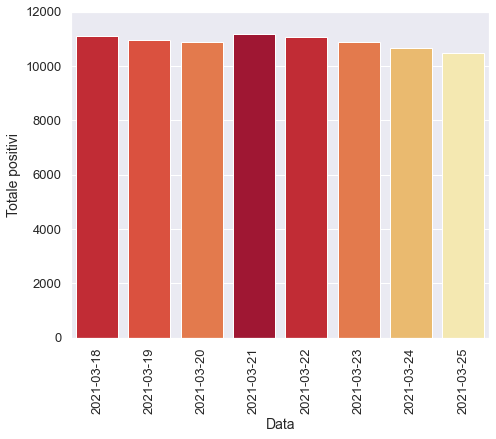

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

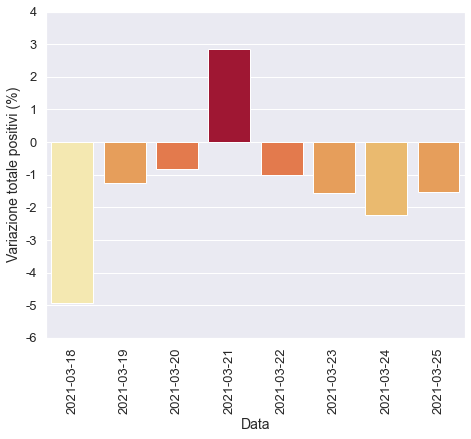

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

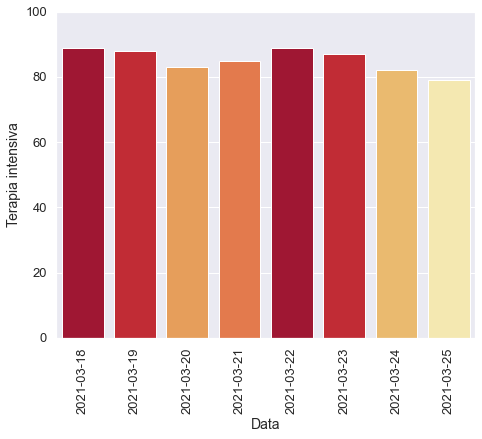

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

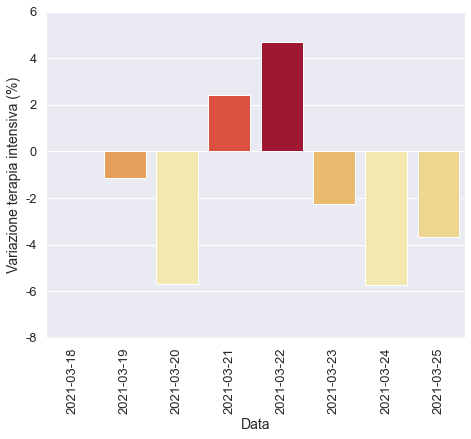

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

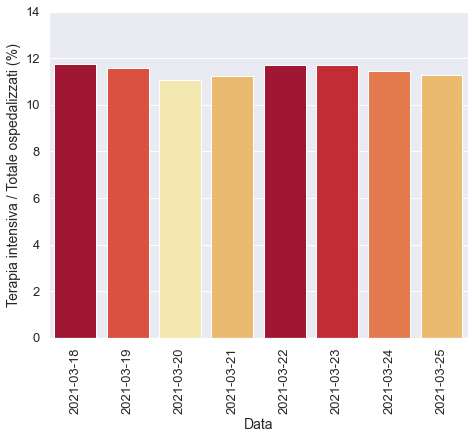

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

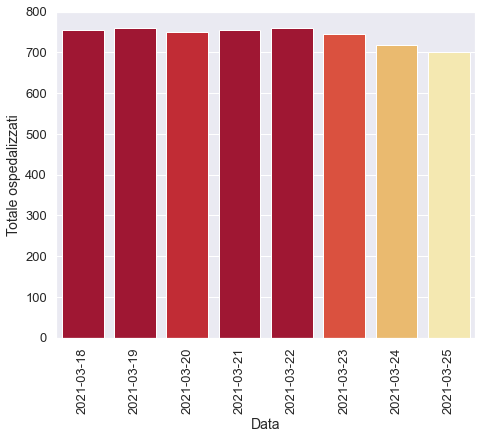

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

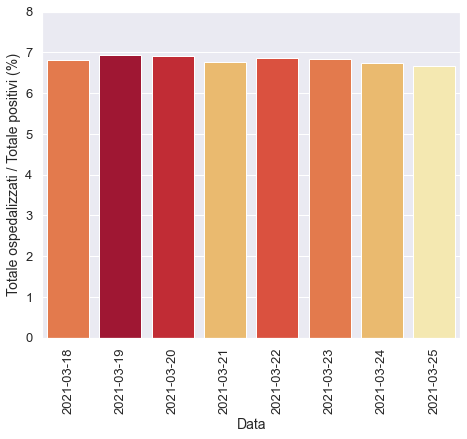

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

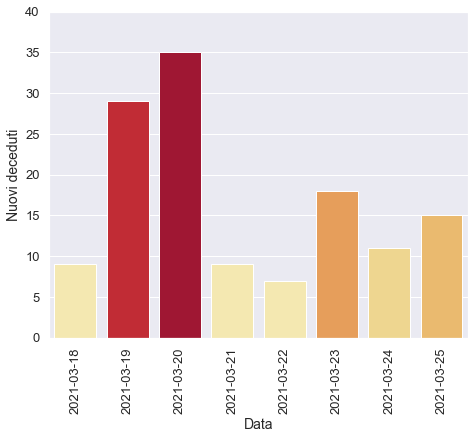

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

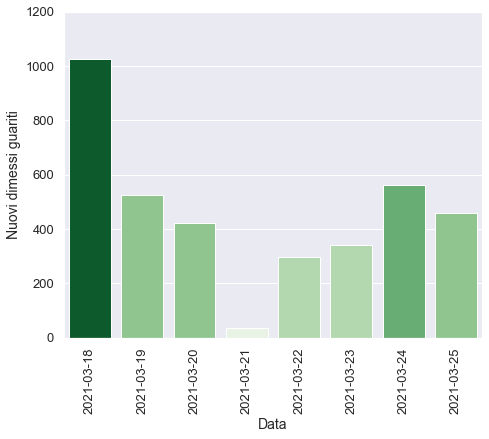

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)